In [20]:
import pandas as pd
import numpy as np
import random
import math
import seaborn as sns
import matplotlib.pyplot as plt
from ipynb.fs.full.utils import get_df, rename_values,remove_value
from ipynb.fs.full.plots import single_barplot
from ipynb.fs.full.bootstrapping_utils import single_option_sampling, bootstrapping, confidence_interval
from statistics import mean, pstdev

In [21]:
# get formatted and ready to use dataframe
df = get_df()

In [22]:
# remove undesired and not useful data
remove_value(df,'0','D4_Role')

In [23]:
valid_options_list = list(df['D4_Role'].unique())

In [24]:
valid_answers_list = list(df['D4_Role'])

In [27]:
bootstrapped_dict_data = bootstrapping(answers=valid_answers_list, all_options=valid_options_list,
                                       replacements=1000, population_size=1000)

In [29]:
lower, X_mean, upper = confidence_interval(data_points=bootstrapped_dict_data['Business Analyst'])

In [30]:
print("Mean: " + str(X_mean) + "| Lower: " + str(lower) + "| Uper: " + str(upper))

Mean: 4.3121| Lower: 4.293199927514028| Uper: 4.331000072485972


In [31]:
# get a pair of values between dict key and all the list values inside that key 
# key: [val_1, val_2] ---> [(key, val_1), (key, val_2)...]
indexes = []
values = []
for idx in bootstrapped_dict_data:
    indexes += [idx for _ in range(len(bootstrapped_dict_data[idx]))]
    values += bootstrapped_dict_data[idx]


In [32]:
# build a dataframe from the population metrics
bootstrapped_df = pd.DataFrame()
bootstrapped_df['Roles'] = indexes
bootstrapped_df['Value'] = values

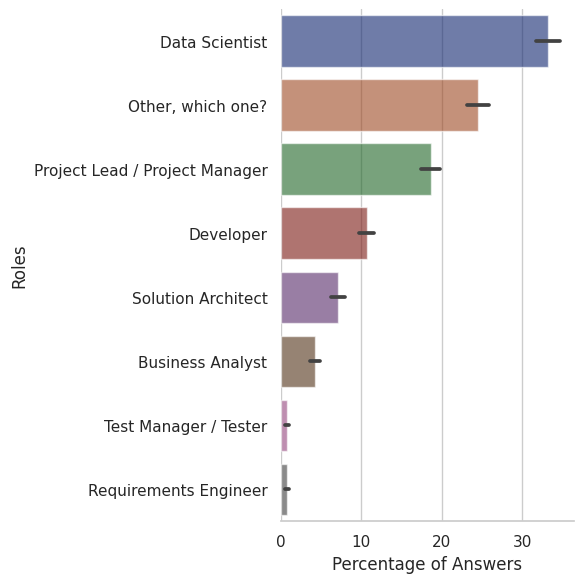

In [34]:
# draw bar plot graphics
d4_plot = sns.catplot(data=bootstrapped_df.sort_values(by=['Value'], ascending = False), 
                      kind="bar", x="Value", y="Roles", ci="sd", 
                      palette="dark", alpha=.6, height=6)
d4_plot.despine(left=True)
d4_plot.set_axis_labels("Percentage of Answers", "Roles")